In [98]:
import cv2

In [99]:
import requests
with open('kaptcha.jpg', 'wb') as f:
    res = requests.get('http://gcis.nat.gov.tw/pub/kaptcha.jpg')
    f.write(res.content)

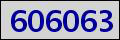

In [135]:
from PIL import Image
import numpy
image = Image.open('kaptcha.jpg')
image

In [136]:
pil_image = Image.open('kaptcha.jpg').convert('RGB')
open_cv_image = numpy.array(pil_image)

In [137]:
# open_cv_image

Populating the interactive namespace from numpy and matplotlib


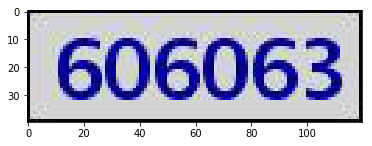

In [138]:
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(open_cv_image)
plt.show()

In [142]:
imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [143]:
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])

In [144]:
ary = []
for (c,_) in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    print((x, y, w, h))
    if w >= 15 and h == 24:
        ary.append((x, y, w, h))
    

(1, 1, 118, 38)
(10, 9, 18, 24)
(15, 21, 8, 8)
(27, 9, 18, 24)
(32, 13, 8, 16)
(45, 9, 18, 24)
(50, 21, 8, 8)
(62, 9, 18, 24)
(67, 13, 8, 16)
(80, 9, 18, 24)
(85, 21, 8, 8)
(99, 9, 15, 24)


In [145]:
print(ary)

[(10, 9, 18, 24), (27, 9, 18, 24), (45, 9, 18, 24), (62, 9, 18, 24), (80, 9, 18, 24), (99, 9, 15, 24)]


Populating the interactive namespace from numpy and matplotlib


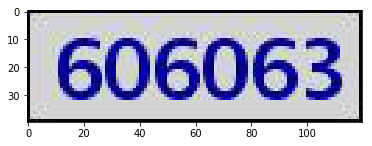

In [146]:
%pylab inline
plt.imshow(open_cv_image)
plt.show()

In [147]:
ary

[(10, 9, 18, 24),
 (27, 9, 18, 24),
 (45, 9, 18, 24),
 (62, 9, 18, 24),
 (80, 9, 18, 24),
 (99, 9, 15, 24)]

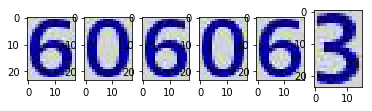

In [149]:
import matplotlib.pyplot as plt
fig = plt.figure()
for id, (x, y , w, h) in enumerate(ary):
    roi = open_cv_image[y:y+h,x:x+w]
    thresh = roi.copy()
    a = fig.add_subplot(1, len(ary), id+1)
    plt.imshow(thresh)
    plt.show

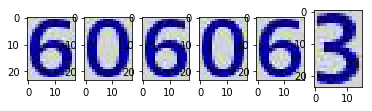

In [150]:
import matplotlib.pyplot as plt
fig = plt.figure()
for id, (x, y , w, h) in enumerate(ary):
    roi = open_cv_image[y:y+h,x:x+w]
    thresh = roi.copy()
    a = fig.add_subplot(1, len(ary), id+1)
    plt.imshow(thresh)
    plt.show
    plt.savefig('{}.jpg'.format(id+1), dpi=100)